In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [120]:
dataset = pd.read_csv('/content/Titanic-Dataset.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
dataset.isnull().sum()  #for missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [122]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())  #Handling missing Values

In [123]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [124]:
dataset.drop(columns=['Cabin'], inplace=True)  #too many missing values

In [125]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [126]:
le_sex = LabelEncoder()
dataset['Sex'] = le_sex.fit_transform(dataset['Sex'])

In [127]:
dataset['Embarked'] = le_sex.fit_transform(dataset['Embarked'])

In [128]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [129]:
dataset.drop(columns=['Name'], inplace=True)
dataset.drop(columns=['Ticket'], inplace=True)

In [130]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


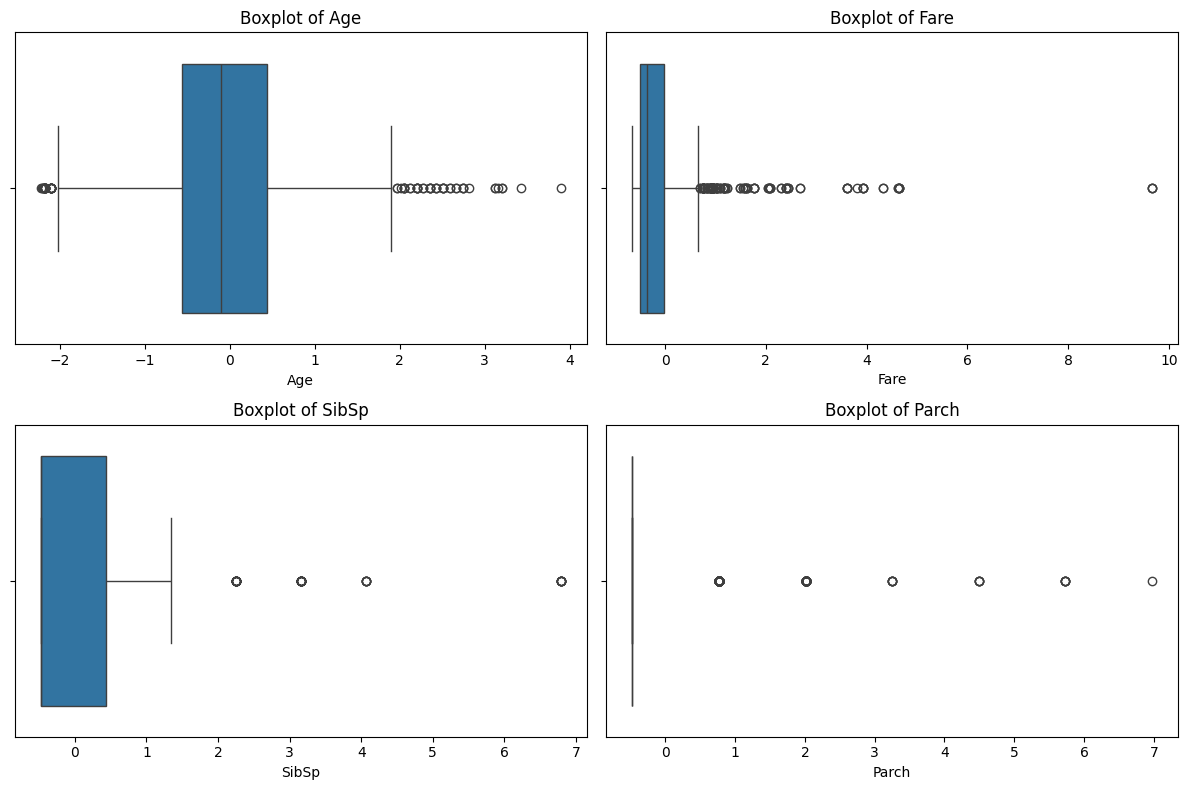

In [137]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [138]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    return df


In [141]:
dataset = remove_outliers(dataset, ['Age', 'Fare', 'SibSp', 'Parch'])
"Dataset shape after removing outliers:", dataset.shape


('Dataset shape after removing outliers:', (290, 9))

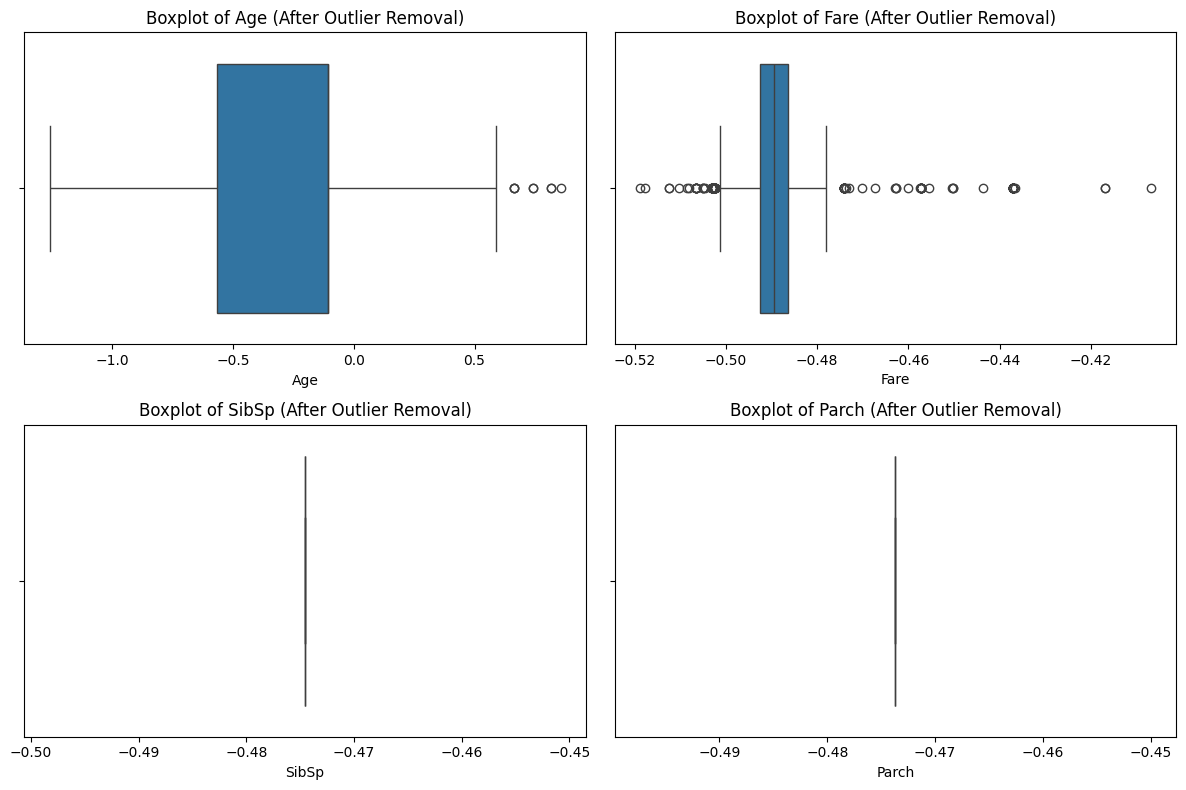

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')

plt.tight_layout()
plt.show()


In [143]:
scaler = StandardScaler()

In [144]:
columns_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])



In [145]:
dataset[columns_to_scale].std()

,0
Age,1.001729
Fare,1.001729
SibSp,0.000000
Parch,0.000000


In [146]:
dataset[columns_to_scale].std(ddof=0)

,0
Age,1.0
Fare,1.0
SibSp,0.0
Parch,0.0


In [147]:
print(dataset['SibSp'].unique())


[0.]


In [148]:
dataset.drop(columns=['SibSp', 'Parch'], inplace=True)


In [151]:
columns_to_scale = ['Age', 'Fare']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [152]:
dataset[columns_to_scale].std()

,0
Age,1.001729
Fare,1.001729
